 All India Agriculture dataset, was found from Kaggle. This data contains the production and area grown for each crop at state level and district level from 1997 to 2015. Here my aim is to predict the crop production of crops  Rice,Maize,Sugarcane and Wheat.  

In [95]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
#Reading the dataset
dt = pd.read_csv('/content/all_india_agriculture_data.csv')
#First 5 observations
dt.head()

,Unnamed: 0,state_names,state_code,district_names,district_code,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production,pressure,yield
0,0,Andaman and Nicobar Islands,AN,NICOBARS,1,2000,Kharif,Arecanut,1254.0,292.640631,2.379571,1016.868671,43,clay,598.552,0.000,0.000,2000.0,1004,1.594896
1,1,Andaman and Nicobar Islands,AN,NICOBARS,1,2000,Kharif,Other Kharif pulses,2.0,292.703959,2.906544,1015.245398,44,sandy,7.182,18.354,0.000,1.0,1004,0.500000
2,2,Andaman and Nicobar Islands,AN,NICOBARS,1,2000,Kharif,Rice,102.0,294.087464,2.139227,1015.611196,42,clay,35.742,0.000,0.000,321.0,1005,3.147059
3,3,Andaman and Nicobar Islands,AN,NICOBARS,1,2000,Whole Year,Banana,176.0,293.216917,2.328995,1017.669100,42,peaty,8.740,8.740,0.000,641.0,1006,3.642045
4,4,Andaman and Nicobar Islands,AN,NICOBARS,1,2000,Whole Year,Cashewnut,720.0,292.782403,2.688837,1015.646975,44,clay,0.615,0.615,0.615,165.0,1004,0.229167


In [97]:
#Shape of dataset
dt.shape

(246091, 20)

The dataset have 246091 observations and 20 features

#Droping Features

In [98]:
#Droping unnecessary features
#Here unnamed is just an index column not useful in analysis
#State code is the code of each state  since we have state name we can remove it
#district code the code of each district  since we have district name we can remove it
#Yield is dependent on production and area therefore it wiil not help in predicting production
dt=dt.drop(['Unnamed: 0','state_code','district_code','yield'],axis=1)

In [99]:
#The Data after droping unnecessary columns
dt.head()

,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production,pressure
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,292.640631,2.379571,1016.868671,43,clay,598.552,0.000,0.000,2000.0,1004
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,292.703959,2.906544,1015.245398,44,sandy,7.182,18.354,0.000,1.0,1004
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,294.087464,2.139227,1015.611196,42,clay,35.742,0.000,0.000,321.0,1005
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,293.216917,2.328995,1017.669100,42,peaty,8.740,8.740,0.000,641.0,1006
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,292.782403,2.688837,1015.646975,44,clay,0.615,0.615,0.615,165.0,1004


In [100]:
#Finding the info
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   state_names     246091 non-null  object 
 1   district_names  246091 non-null  object 
 2   crop_year       246091 non-null  int64  
 3   season_names    246091 non-null  object 
 4   crop_names      246091 non-null  object 
 5   area            246091 non-null  float64
 6   temperature     246091 non-null  float64
 7   wind_speed      246091 non-null  float64
 8   precipitation   246091 non-null  float64
 9   humidity        246091 non-null  int64  
 10  soil_type       246091 non-null  object 
 11  N               246091 non-null  float64
 12  P               246091 non-null  float64
 13  K               246091 non-null  float64
 14  production      242364 non-null  float64
 15  pressure        246091 non-null  int64  
dtypes: float64(8), int64(3), object(5)
memory usage: 30.0+ M

Here we have 5 object type data 11 float type data. There are missing observations in the data set

#Treating Missing Values

In [101]:
#Finding the number of missing values
dt.isna().sum()

state_names          0
district_names       0
crop_year            0
season_names         0
crop_names           0
area                 0
temperature          0
wind_speed           0
precipitation        0
humidity             0
soil_type            0
N                    0
P                    0
K                    0
production        3727
pressure             0
dtype: int64

Since the number of missing values are very small compared to the total number of observations i am dropping the missing values

In [102]:
#Removing NA observations
dt=dt.dropna()

In [103]:
#Checking NA values
dt.isna().sum()

state_names       0
district_names    0
crop_year         0
season_names      0
crop_names        0
area              0
temperature       0
wind_speed        0
precipitation     0
humidity          0
soil_type         0
N                 0
P                 0
K                 0
production        0
pressure          0
dtype: int64

null values are removed

In [104]:
#Crops and its corresponding frequency
dt['crop_names'].value_counts().head(10)

crop_names
Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Groundnut             8770
Wheat                 7878
Sugarcane             7827
Rapeseed &Mustard     7533
Arhar/Tur             7476
Name: count, dtype: int64

Here we are considering only prediction of  Rice,Maize,Sugarcane and Wheat

In [105]:
#Data with crops Rice,Maize,Sugarcane and Wheat
dt=dt[dt['crop_names'].isin(['Rice','Maize','Sugarcane','Wheat'])]

In [106]:
#Checking the crop name and its frequency
dt.crop_names.value_counts()

crop_names
Rice         15082
Maize        13787
Wheat         7878
Sugarcane     7827
Name: count, dtype: int64

In [107]:
dt.head(5)

,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production,pressure
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,294.087464,2.139227,1015.611196,42,clay,35.742,0.000,0.000,321.00,1005
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,294.141248,2.279325,1014.852127,43,peaty,4.530,11.778,11.778,2.00,1006
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.0,293.715910,2.913301,1015.331829,42,silt,1.728,2.160,0.000,300.00,1004
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,293.408608,2.760585,1014.477943,44,loamy,834.164,0.000,0.000,1.00,1006
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.2,293.055083,2.057067,1014.314806,43,silt,49.329,0.000,0.000,510.84,1005


In [108]:
#Reseting the index
dt = dt.reset_index(drop=True)

In [109]:
dt.head(5)

,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production,pressure
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,294.087464,2.139227,1015.611196,42,clay,35.742,0.000,0.000,321.00,1005
1,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,294.141248,2.279325,1014.852127,43,peaty,4.530,11.778,11.778,2.00,1006
2,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.0,293.715910,2.913301,1015.331829,42,silt,1.728,2.160,0.000,300.00,1004
3,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,293.408608,2.760585,1014.477943,44,loamy,834.164,0.000,0.000,1.00,1006
4,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.2,293.055083,2.057067,1014.314806,43,silt,49.329,0.000,0.000,510.84,1005


In [110]:
dt.shape

(44574, 16)

Now we have 44574 observations and 16 features for further analysis

In [111]:
#Basic Statistical Measures
dt.describe()

,crop_year,area,temperature,wind_speed,precipitation,humidity,N,P,K,production,pressure
count,44574.000000,44574.000000,44574.000000,44574.000000,44574.000000,44574.000000,44574.000000,44574.000000,44574.000000,4.457400e+04,44574.000000
mean,2005.675439,31748.836146,303.296734,2.469019,1016.009404,66.467829,62.126018,13.146419,6.187694,1.962426e+05,1003.752389
std,5.069206,56484.153244,4.560690,0.337772,1.302390,16.363367,204.361396,23.779302,14.141557,9.027233e+05,4.152820
min,1997.000000,0.200000,287.671587,0.272823,1010.352340,32.000000,0.000000,0.000000,0.000000,0.000000e+00,974.000000
25%,2001.000000,453.000000,300.313121,2.214877,1014.971510,54.000000,0.615000,0.000000,0.000000,1.408000e+03,1001.000000
50%,2006.000000,5263.500000,303.386195,2.468864,1015.968500,62.000000,4.068000,3.760000,0.000000,1.530306e+04,1003.000000
75%,2010.000000,37513.750000,307.211287,2.721607,1017.007318,80.000000,10.500000,15.870000,1.501000,1.118082e+05,1006.000000
max,2015.000000,687000.000000,312.363755,4.480037,1027.963207,103.000000,928.372000,111.200000,55.600000,3.715800e+07,1029.000000


In [112]:
#Basic understanding of Categorical features
dt.describe(include='object')

,state_names,district_names,season_names,crop_names,soil_type
count,44574,44574,44574,44574,44574
unique,33,645,6,4,7
top,Uttar Pradesh,AURANGABAD,Kharif,Rice,silty
freq,6711,194,15196,15082,6440


Here we can see that there are 645 distinct district names i am dropping that feature for the convenience of analysis

In [113]:
#Dropping District Name
dt=dt.drop('district_names',axis=1)

In [114]:
dt.head(5)

,state_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production,pressure
0,Andaman and Nicobar Islands,2000,Kharif,Rice,102.0,294.087464,2.139227,1015.611196,42,clay,35.742,0.000,0.000,321.00,1005
1,Andaman and Nicobar Islands,2000,Whole Year,Sugarcane,1.0,294.141248,2.279325,1014.852127,43,peaty,4.530,11.778,11.778,2.00,1006
2,Andaman and Nicobar Islands,2001,Kharif,Rice,83.0,293.715910,2.913301,1015.331829,42,silt,1.728,2.160,0.000,300.00,1004
3,Andaman and Nicobar Islands,2001,Whole Year,Sugarcane,1.0,293.408608,2.760585,1014.477943,44,loamy,834.164,0.000,0.000,1.00,1006
4,Andaman and Nicobar Islands,2002,Kharif,Rice,189.2,293.055083,2.057067,1014.314806,43,silt,49.329,0.000,0.000,510.84,1005


In [115]:
#Correlation Matrix of the data
dt.select_dtypes(exclude=['object']).corr()


,crop_year,area,temperature,wind_speed,precipitation,humidity,N,P,K,production,pressure
crop_year,1.000000,-0.006139,-0.026772,-0.001665,0.008538,-0.009632,-0.004873,0.004969,0.001051,0.000678,0.045958
area,-0.006139,1.000000,0.043733,0.010246,-0.007542,-0.006213,0.004140,-0.004635,-0.002501,0.269701,-0.078806
temperature,-0.026772,0.043733,1.000000,-0.004582,-0.048017,-0.342993,-0.007041,-0.003696,-0.006096,0.033538,-0.352579
wind_speed,-0.001665,0.010246,-0.004582,1.000000,-0.013054,-0.003763,0.005203,0.000900,0.004288,0.003253,0.005614
precipitation,0.008538,-0.007542,-0.048017,-0.013054,1.000000,0.008073,0.004229,0.000182,-0.001475,-0.003771,0.074535
humidity,-0.009632,-0.006213,-0.342993,-0.003763,0.008073,1.000000,0.001333,0.002533,-0.002664,-0.028222,-0.181740
N,-0.004873,0.004140,-0.007041,0.005203,0.004229,0.001333,1.000000,-0.101014,-0.066358,0.008893,-0.000637
P,0.004969,-0.004635,-0.003696,0.000900,0.000182,0.002533,-0.101014,1.000000,0.868468,-0.003188,0.003016
K,0.001051,-0.002501,-0.006096,0.004288,-0.001475,-0.002664,-0.066358,0.868468,1.000000,0.001344,0.008424
production,0.000678,0.269701,0.033538,0.003253,-0.003771,-0.028222,0.008893,-0.003188,0.001344,1.000000,0.000035


#Heatmap

<Axes: >

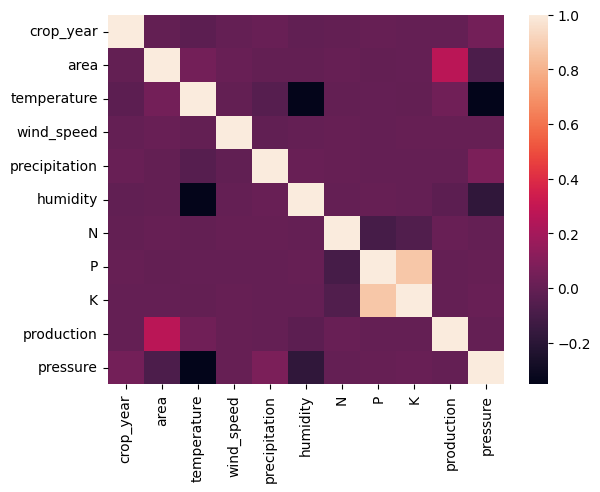

In [116]:
#Heat map of correlation matrix
sns.heatmap(dt.select_dtypes(exclude=['object']).corr())

There is a high correlation between p-phospherous and k-potassium therefore we can remove k or p

In [117]:
dt.head(2)

,state_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production,pressure
0,Andaman and Nicobar Islands,2000,Kharif,Rice,102.0,294.087464,2.139227,1015.611196,42,clay,35.742,0.000,0.000,321.0,1005
1,Andaman and Nicobar Islands,2000,Whole Year,Sugarcane,1.0,294.141248,2.279325,1014.852127,43,peaty,4.530,11.778,11.778,2.0,1006


In [118]:
#Dropping Potassium
dt.drop('P',axis=1,inplace=True)

In [119]:
dt.head(2)

,state_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,K,production,pressure
0,Andaman and Nicobar Islands,2000,Kharif,Rice,102.0,294.087464,2.139227,1015.611196,42,clay,35.742,0.000,321.0,1005
1,Andaman and Nicobar Islands,2000,Whole Year,Sugarcane,1.0,294.141248,2.279325,1014.852127,43,peaty,4.530,11.778,2.0,1006


Now we need to go for Encoding the categorical variables using Label Encoding

In [120]:
#Importing label encoder
from sklearn.preprocessing import LabelEncoder

In [121]:
le = LabelEncoder()

In [122]:
dt['state_names']=le.fit_transform(dt['state_names'])

In [123]:
dt['season_names']=le.fit_transform(dt['season_names'])

In [124]:
dt['crop_names']=le.fit_transform(dt['crop_names'])

In [125]:
dt['soil_type']=le.fit_transform(dt['soil_type'])

In [126]:
dt.head(5)

,state_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,K,production,pressure
0,0,2000,1,1,102.0,294.087464,2.139227,1015.611196,42,1,35.742,0.000,321.00,1005
1,0,2000,4,2,1.0,294.141248,2.279325,1014.852127,43,3,4.530,11.778,2.00,1006
2,0,2001,1,1,83.0,293.715910,2.913301,1015.331829,42,5,1.728,0.000,300.00,1004
3,0,2001,4,2,1.0,293.408608,2.760585,1014.477943,44,2,834.164,0.000,1.00,1006
4,0,2002,1,1,189.2,293.055083,2.057067,1014.314806,43,5,49.329,0.000,510.84,1005


All the categorical variables are encoded

#Regression Analysis

In [127]:
#Splitting dependent and independent variables
y=dt['production']
x=dt.drop('production',axis=1)

In [128]:
#Independent variables
x.head(5)

,state_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,K,pressure
0,0,2000,1,1,102.0,294.087464,2.139227,1015.611196,42,1,35.742,0.000,1005
1,0,2000,4,2,1.0,294.141248,2.279325,1014.852127,43,3,4.530,11.778,1006
2,0,2001,1,1,83.0,293.715910,2.913301,1015.331829,42,5,1.728,0.000,1004
3,0,2001,4,2,1.0,293.408608,2.760585,1014.477943,44,2,834.164,0.000,1006
4,0,2002,1,1,189.2,293.055083,2.057067,1014.314806,43,5,49.329,0.000,1005


Our next step is to split the data into train and test here i will stratify the train test split using crop names

In [129]:
#Creating Labels for stratifying in train test split
labels=np.array(x['crop_names'])

In [130]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=labels,random_state=42,test_size=0.25)

#Performing Random Forest Regression

In [131]:
#Fitting the data
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()
rf_reg.fit(x_train,y_train)

RandomForestRegressor()

In [132]:
#Predicting x test
rf_pred=rf_reg.predict(x_test)

In [133]:
#Accuracy of the model
from sklearn.metrics import r2_score
print("R-squared:",r2_score(y_test,rf_pred))
from sklearn.metrics import mean_squared_error
print("MSE is:",mean_squared_error(y_test,rf_pred))

R-squared: 0.8902428265468256
MSE is: 81163413940.23792


In [135]:
#Adjusted R-squared
n_samples = len(y_test)
n_features=x_train.shape[1]
adjusted_r2 = 1 - (1 -0.8902428265468256) * (n_samples - 1) / (n_samples - n_features - 1)
adjusted_r2

0.8901146285904113

Now we can go for feature importance where we can find which features have the biggest impact on the predictions made by your model.

In [136]:
Rand_reg=rf_reg.fit(x_train,y_train)

In [137]:
#Feature importance
importances = Rand_reg.feature_importances_
importances

array([0.01317474, 0.0376106 , 0.00853267, 0.5819325 , 0.25405641,
       0.01919876, 0.00544465, 0.00904688, 0.0347619 , 0.00591124,
       0.00404195, 0.00716496, 0.01912274])

In [138]:
#Creating Feature Importance table
feature_importances_df = pd.DataFrame({
    "feature": x_train.columns,
    "importance": importances*100
})

In [139]:
#Sorting importance
feature_importances_df = feature_importances_df.sort_values(by="importance", ascending=False)

In [140]:
#Feature importance table
feature_importances_df

,feature,importance
3,crop_names,58.193250
4,area,25.405641
1,crop_year,3.761060
8,humidity,3.476190
5,temperature,1.919876
12,pressure,1.912274
0,state_names,1.317474
7,precipitation,0.904688
2,season_names,0.853267
11,K,0.716496


Here from the feature importance table crop name is the most important feature with almost 60% importance and then comes area,crop year,humidity etc. So for reducing the independent features i am considering only the top 8 importance feature and removing the other features

In [141]:
#Droping columns
dt.drop(['precipitation','K','N','wind_speed','soil_type'],axis=1,inplace=True)

In [142]:
dt.head(2)

,state_names,crop_year,season_names,crop_names,area,temperature,humidity,production,pressure
0,0,2000,1,1,102.0,294.087464,42,321.0,1005
1,0,2000,4,2,1.0,294.141248,43,2.0,1006


In [143]:
dt.shape

(44574, 9)

#Performing Random Forest Regression After Reducing Features

In [144]:
#Splitting dependent and independent variables
y=dt['production']
x=dt.drop('production',axis=1)

In [145]:
#Creating Labels for stratifying in train test split
labels=np.array(x['crop_names'])

In [146]:
#Splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=labels,random_state=42,test_size=0.25)

In [147]:
#Fitting the data
rf_reg.fit(x_train,y_train)

RandomForestRegressor()

In [148]:
#Predicting x test
rf_pred=rf_reg.predict(x_test)

In [149]:
#Accuracy of the model
print("R-squared:",r2_score(y_test,rf_pred))
print("MSE is:",mean_squared_error(y_test,rf_pred))

R-squared: 0.919722092416527
MSE is: 59364038253.34783


In [150]:
#Adjusted R-squared
n_samples = len(y_test)
n_features=x_train.shape[1]
adjusted_r2 = 1 - (1 -0.9172977072266411) * (n_samples - 1) / (n_samples - n_features - 1)
adjusted_r2

0.9172382893243342

In [151]:
#Checking whether MSE decreased for the new model than the previous one
82893582291.67116>59364038253.34783

True

Hence for the new model MSE has decreased and adjusted R-squared value increased

Since we have a High R-squared value we can go for cross validation to check whether the model is overfitting or not

# CROSS VALIDATION

In [152]:
from sklearn.model_selection import StratifiedKFold
strat_validator=StratifiedKFold(n_splits=5,shuffle=True)

In [153]:
for train_index, test_index in strat_validator.split(x, labels):

    # Get training and testing data for the current fold
    X_train_fold, X_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Create and train the Random Forest model
    model = RandomForestRegressor()
    model.fit(X_train_fold, y_train_fold)

    # Evaluate the model on the testing data
    y_pred = model.predict(X_test_fold)
    score = r2_score(y_test_fold, y_pred)
    print(f"Fold score: {score}")

Fold score: 0.9324955292061472
Fold score: 0.9076111875583035
Fold score: 0.9702349043119131
Fold score: 0.9616502082970589
Fold score: 0.9081417364508191


In [154]:
#Finding the mean of the r-square values
np.mean([0.9324955292061472,0.9076111875583035,0.9702349043119131, 0.9616502082970589,0.9081417364508191])

0.9360267131648484

Since the cross validated R-squared mean value 0.94 is near to the mean value
0.92 of our model we can conclude that there is no overfitting

# Exporting the model for deployement

In [ ]:
#Now we can pickle the model for deployment
import pickle
pickle.dump(rf_reg,open("model.pkl","wb"))

In [ ]:
#Reading the model
pickled_model = pickle.load(open('model.pkl','rb'))

In [ ]:
#Checking the prediction
pickled_model.predict(np.array([[2,4,2,102,250,1025,42,4]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1423.97])

In [ ]:
#Installing bz2file for compressing the pickle file
pip install bz2file

  Preparing metadata (setup.py) ... done
  Created wheel for bz2file: filename=bz2file-0.98-py3-none-any.whl size=6868 sha256=a90f1b43e3bc2a69a85ef671e7991b72cc0956381c30e9bf2e5e66d9ce4b537d
  Stored in directory: /root/.cache/pip/wheels/69/ee/f7/6fccd10cb65421ba2da64fa6caf8ee7fbae0059884af8c8587
Successfully built bz2file


In [ ]:
import bz2file as bz2

In [ ]:
def compressed_pickle(title, data):
 with bz2.BZ2File(title + '.pbz2', 'w') as f:
  pickle.dump(data, f)

In [ ]:
compressed_pickle('model.pkl', rf_reg.fit(x_train,y_train))


#**THE END**